<a href="https://colab.research.google.com/github/salmasherif123/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.util.shape import view_as_blocks

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#centroid function
def centroid(x):
  c = np.empty(0)
  for i in range(x.shape[0]):
    xBar=0
    yBar=0
    sum = np.sum(x[i])
    if sum==0:
      c=np.append(c,xBar)
      c=np.append(c,yBar)
      continue
    for j in range(x.shape[1]):
      for k in range(x.shape[2]):
        xBar+=(x[i][j][k]*j)
        yBar+=(x[i][j][k]*k)
    c=np.append(c,xBar/sum)
    c=np.append(c,yBar/sum)
  return c


def distance(x,y):
  return np.sqrt(np.sum(np.square(x-y)))

# 1NN function
# x is the feature vector of one number
# y is the train feature vectors matrix

def KNN(x,y):
  mini=1e9
  index=-1
  for i in range(y.shape[0]):
    d=distance(x,y[i])
    if mini>d:
      index = i
    mini = min(mini,d)
  return index

def feature_vector(x,size):
  features=[]
  for i in range(size):
    x_blocks = view_as_blocks(x[i],(7,7))
    reshaped_matrix = np.reshape(x_blocks,(16,7,7))
    x_centroid=centroid(reshaped_matrix)
    features.append(x_centroid)
  features=np.array(features)
  return features

def accuracy(xtrain,xtest,ytrain,ytest):
  error=[]
  counter=0
  for i in range(xtest.shape[0]):
    j = KNN(xtest[i],xtrain)
    if ytrain[j]==ytest[i]:
      counter+=1
    else:
      error.append(i)
  error = np.array(error)
  return (counter/len(ytest))*100,error

In [ ]:
#training
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
train_vector = feature_vector(x_train,x_train.shape[0])

In [ ]:
#testing 
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]
test_vector = feature_vector(x_test,x_test.shape[0])
ac,error=accuracy(train_vector,test_vector,y_train,y_test)
print(ac,len(error))

84.89999999999999 151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


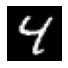

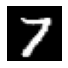

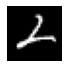

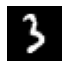

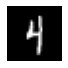

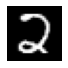

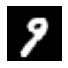

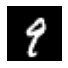

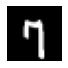

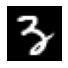

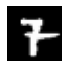

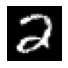

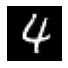

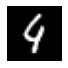

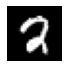

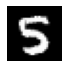

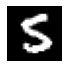

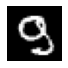

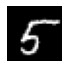

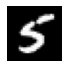

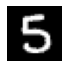

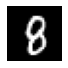

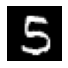

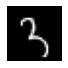

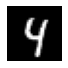

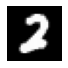

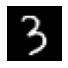

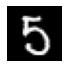

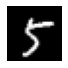

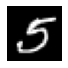

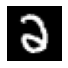

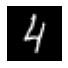

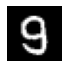

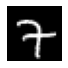

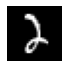

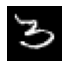

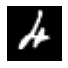

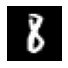

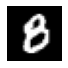

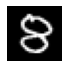

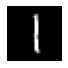

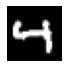

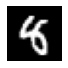

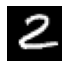

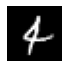

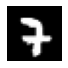

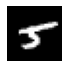

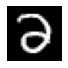

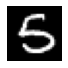

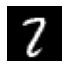

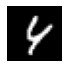

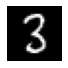

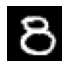

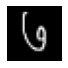

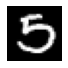

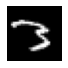

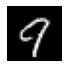

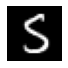

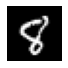

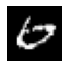

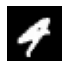

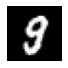

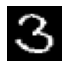

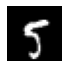

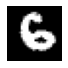

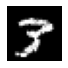

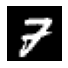

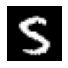

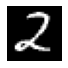

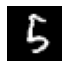

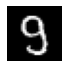

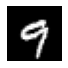

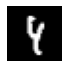

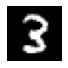

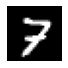

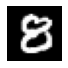

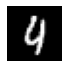

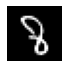

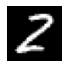

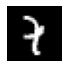

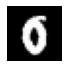

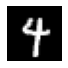

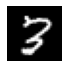

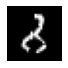

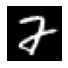

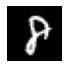

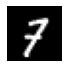

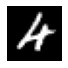

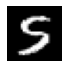

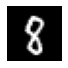

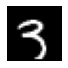

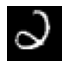

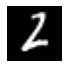

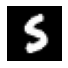

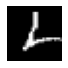

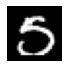

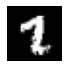

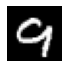

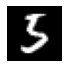

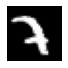

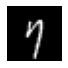

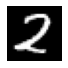

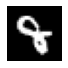

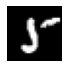

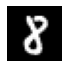

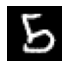

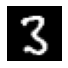

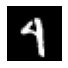

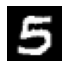

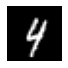

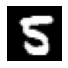

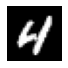

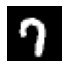

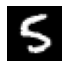

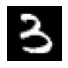

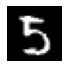

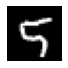

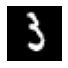

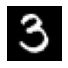

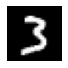

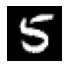

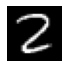

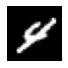

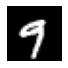

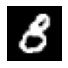

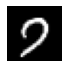

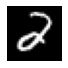

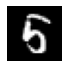

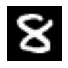

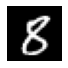

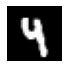

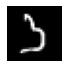

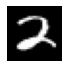

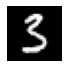

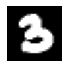

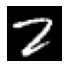

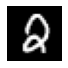

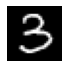

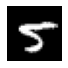

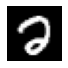

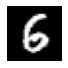

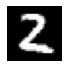

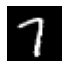

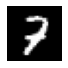

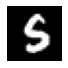

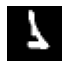

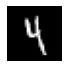

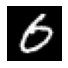

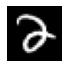

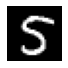

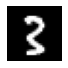

In [ ]:
for i in range(len(error)):
  plt.figure(figsize=(1,1))
  plt.imshow(x_test[error[i]],cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
x=view_as_blocks(x_train[0],(7,7))
print(x.shape)

(4, 4, 7, 7)


In [ ]:
print(np.reshape(x,(16,7,7)).shape)

(16, 7, 7)
